In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [3]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [4]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
df = pd.read_excel(r'C:\Users\alpeker\Desktop\CinkoProjesi\output1.xlsx')
df.rename(columns={'Unnamed: 0':'date'}, inplace=True )
df['date'] = pd.to_datetime(df['date'], format='%Y_%m')
# Set the date as index 
df = df.set_index('date')


In [6]:
df=df.drop(['LME_Zinc_3_month','LME_Tin_3_month_gecenay', 'LME_Tin_stock_gecenay', 'LME_Lead_Cash_Settlement_gecenay', 'LME_Lead_3_month_gecenay', 'LME_Lead_stock_gecenay', 'LME_Copper_Cash_Settlement_gecenay', 'LME_Copper_3_month_gecenay', 'LME_Copper_stock_gecenay', 'LME_Alum_Cash_Settlement_gecenay', 'LME_Alum_3_month_gecenay', 'LME_Alum_stock_gecenay', 'LME_Nickel_Cash_Settlement_gecenay', 'LME_Nickel_3_month_gecenay', 'LME_Nickel_stock_gecenay', 'LME_Zinc_Cash_Settlement_ucayonce', 'LME_Zinc_3_month_ucayonce', 'LME_Zinc_stock_ucayonce', 'LME_Tin_Cash_Settlement_ucayonce', 'LME_Tin_3_month_ucayonce', 'LME_Tin_stock_ucayonce', 'LME_Lead_Cash_Settlement_ucayonce', 'LME_Lead_3_month_ucayonce', 'LME_Lead_stock_ucayonce', 'LME_Copper_Cash_Settlement_ucayonce', 'LME_Copper_3_month_ucayonce', 'LME_Copper_stock_ucayonce', 'LME_Alum_Cash_Settlement_ucayonce', 'LME_Alum_3_month_ucayonce', 'LME_Alum_stock_ucayonce', 'LME_Nickel_Cash_Settlement_ucayonce', 'LME_Nickel_3_month_ucayonce', 'LME_Nickel_stock_ucayonce', 'Close_gecenay_usdollar', 'Close_ucayonce_usdollar','Close_gecenay_dowjones', 'Close_ucayonce_dowjones','Close_gecenay_msciemerging', 'Close_ucayonce_msciemerging','Close_gecenay_sp500', 'Close_ucayonce_sp500', 'Close_gecenay_usbond', 'Close_ucayonce_usbond', 'Close_gecenay_gold', 'Close_ucayonce_gold','Close_gecenay_brentoil', 'Close_ucayonce_brentoil',  'Close_gecenay_naturalgas', 'Close_ucayonce_naturalgas','Close_gecenay_VIX', 'Close_ucayonce_VIX','Close_gecenay_noranda', 'Close_ucayonce_noranda','Close_gecenay_teck', 'Close_ucayonce_teck','Close_gecenay_chinaminmetals', 'Close_ucayonce_chinaminmetals','Close_gecenay_boliden', 'Close_ucayonce_boliden','Close_gecenay_nyrstar', 'Close_ucayonce_nyrstar','Close_gecenay_eurusd', 'Close_ucayonce_eurusd','Close_gecenay_usdidr', 'Close_ucayonce_usdidr','Close_gecenay_usdclp', 'Close_ucayonce_usdclp', 'Close_gecenay_usdaud', 'Close_ucayonce_usdaud','Close_gecenay_usdcny', 'Close_ucayonce_usdcny','MACD3', 'MACD3-1', 'MACD6', 'MACD6-1', 'Cash-3Month', '3AyOrtalama'], axis=1)

In [7]:
df.drop(df.index[range(4)])
df = df.drop(df.index[-1])

In [8]:
print(df.columns.isnull().sum())

0


In [9]:
df

,LME_Zinc_Cash_Settlement,LME_Zinc_stock,LME_Tin_Cash_Settlement,LME_Tin_3_month,LME_Tin_stock,LME_Lead_Cash_Settlement,LME_Lead_3_month,LME_Lead_stock,LME_Copper_Cash_Settlement,LME_Copper_3_month,...,Close_boliden,Close_nyrstar,Close_eurusd,Close_usdidr,Close_usdclp,Close_usdaud,Close_usdcny,ChinaPMI,USPMI,Interval_Information
date,,,,,,,,,,,,,,,,,,,,,
2012-07-01,1851.181818,9.975602e+05,18612.500000,18616.136364,12070.681818,1876.386364,1888.545455,340931.818182,7589.386364,7591.181818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.1,51.8,0.000125
2012-08-01,1813.795455,9.753989e+05,18668.333333,18664.761905,11648.333333,1895.750000,1905.659091,320339.772727,7492.454545,7502.068182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.2,51.9,0.000086
2012-09-01,2002.100000,9.504962e+05,20696.750000,20658.250000,11863.500000,2169.275000,2177.775000,291088.750000,8068.375000,8076.925000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.8,51.5,0.000565
2012-10-01,1911.782609,1.066591e+06,21320.652174,21300.434783,11860.000000,2153.304348,2155.065217,289120.652174,8069.521739,8071.000000,...,113.978261,21.110000,1.296522,9561.413043,475.191304,0.972174,6.273478,50.2,51.3,0.000229
2012-11-01,1904.295455,1.176047e+06,20700.227273,20684.772727,11725.000000,2179.477273,2170.295455,339007.954545,7694.204545,7706.477273,...,114.950000,19.280455,1.284091,9579.440909,479.940909,0.960455,6.236364,50.6,52.4,0.000212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,3317.295455,1.807739e+05,39332.727273,38042.045455,887.045455,2347.568182,2318.159091,55942.045455,9765.477273,9595.954545,...,305.590909,0.263636,1.142273,14285.522727,813.238636,1.365455,6.391364,50.1,59.1,0.996574
2021-12-01,3407.880952,1.846464e+05,39573.809524,38956.190476,1665.238095,2304.785714,2278.666667,55402.380952,9550.309524,9524.666667,...,338.542857,0.226957,1.130000,14323.856522,846.496522,1.397391,6.369130,50.3,57.8,0.998612
2022-01-01,3609.950000,1.775350e+05,41807.000000,41344.250000,2153.500000,2342.700000,2328.400000,54006.250000,9775.925000,9748.400000,...,377.015000,0.299524,1.131905,14339.842857,820.074286,1.391905,6.352381,50.0,55.0,0.999816


In [10]:
y = df['LME_Zinc_Cash_Settlement']
y

date
2012-07-01    1851.181818
2012-08-01    1813.795455
2012-09-01    2002.100000
2012-10-01    1911.782609
2012-11-01    1904.295455
                 ...     
2021-11-01    3317.295455
2021-12-01    3407.880952
2022-01-01    3609.950000
2022-02-01    3644.225000
2022-03-01    3883.000000
Name: LME_Zinc_Cash_Settlement, Length: 117, dtype: float64

In [11]:
y

date
2012-07-01    1851.181818
2012-08-01    1813.795455
2012-09-01    2002.100000
2012-10-01    1911.782609
2012-11-01    1904.295455
                 ...     
2021-11-01    3317.295455
2021-12-01    3407.880952
2022-01-01    3609.950000
2022-02-01    3644.225000
2022-03-01    3883.000000
Name: LME_Zinc_Cash_Settlement, Length: 117, dtype: float64

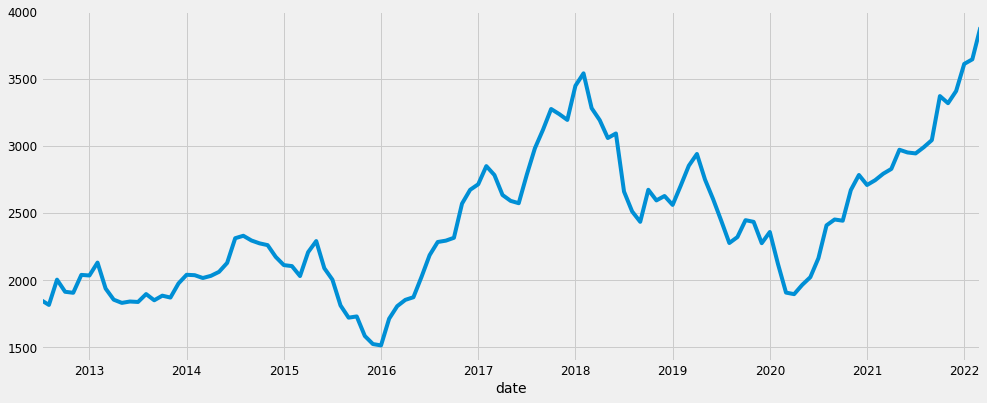

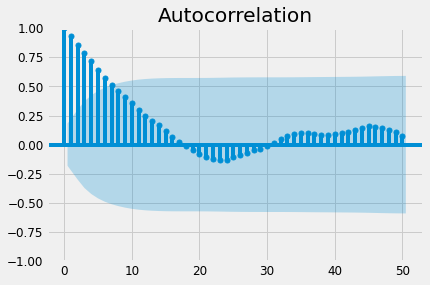

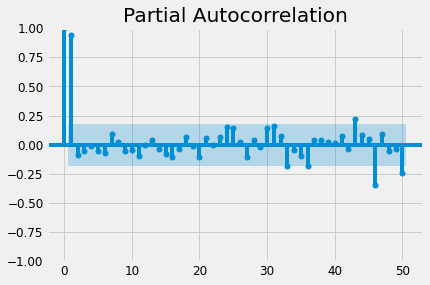

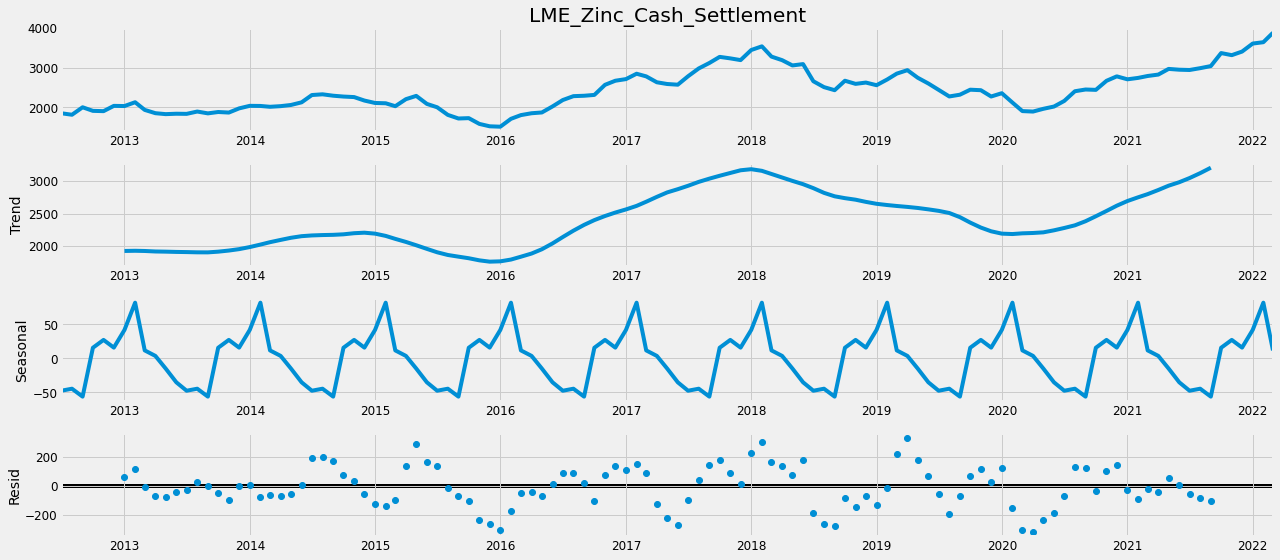

In [12]:
y.plot(figsize=(15, 6))
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y, lags=50)
matplotlib.pyplot.show()
plot_pacf(y, lags=50)
matplotlib.pyplot.show()

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
y

date
2012-07-01    1851.181818
2012-08-01    1813.795455
2012-09-01    2002.100000
2012-10-01    1911.782609
2012-11-01    1904.295455
                 ...     
2021-11-01    3317.295455
2021-12-01    3407.880952
2022-01-01    3609.950000
2022-02-01    3644.225000
2022-03-01    3883.000000
Name: LME_Zinc_Cash_Settlement, Length: 117, dtype: float64

In [14]:
#apply adf test on the series
print(adf_test(y))
print(kpss_test(y))

Results of Dickey-Fuller Test:
Test Statistic                  -0.655946
p-value                          0.857833
#Lags Used                       1.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
None
Results of KPSS Test:
Test Statistic           0.911488
p-value                  0.010000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<AxesSubplot:xlabel='date'>

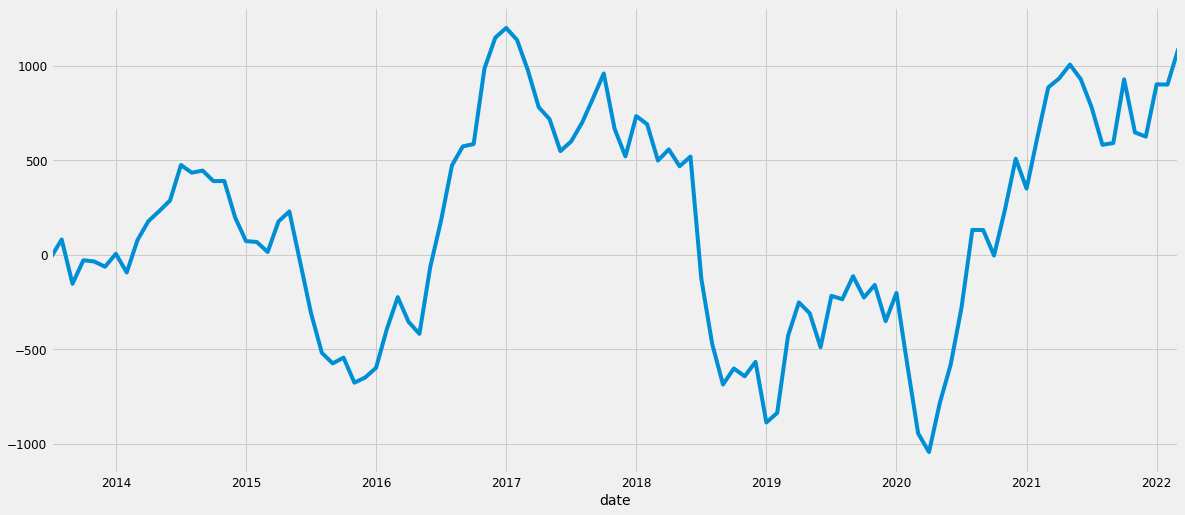

In [15]:
ts_y = y - y.shift(12 )
ts_y = ts_y.dropna()
ts_y.plot()

In [16]:
#apply adf test on the series
print(adf_test(ts_y))
print(kpss_test(ts_y))

Results of Dickey-Fuller Test:
Test Statistic                 -1.882168
p-value                         0.340496
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64
None
Results of KPSS Test:
Test Statistic           0.13152
p-value                  0.10000
Lags Used                5.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64
None


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


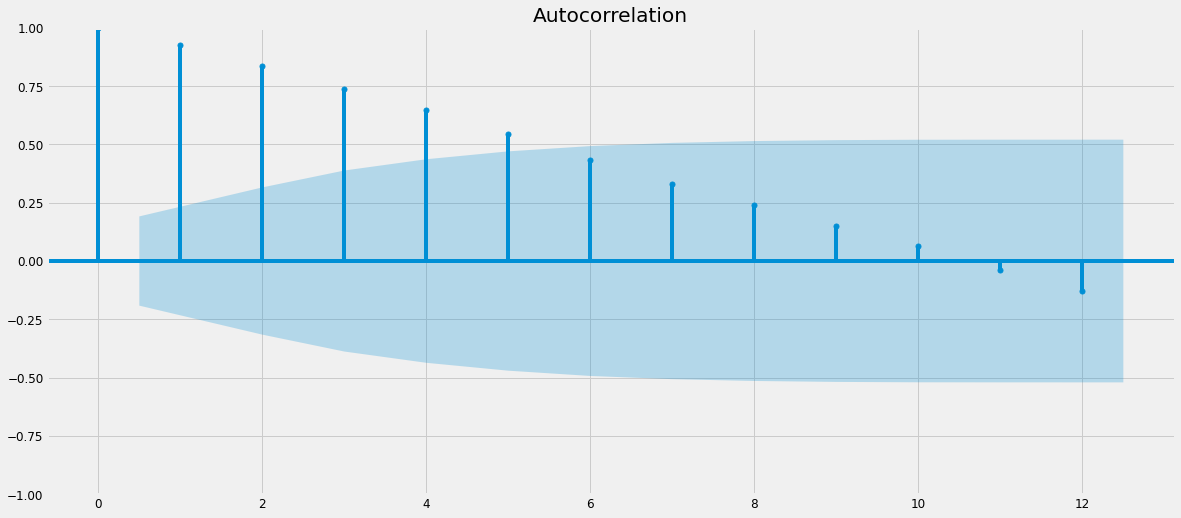

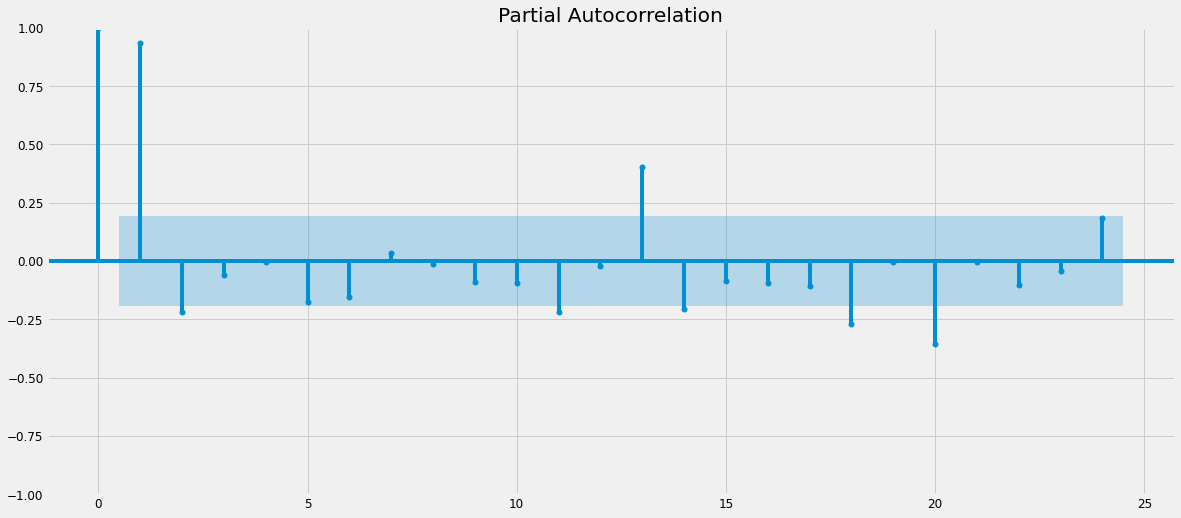

In [17]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_y, lags=12)
matplotlib.pyplot.show()
plot_pacf(ts_y, lags = 24)
matplotlib.pyplot.show()

In [18]:
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.343108
         Iterations: 2
         Function evaluations: 46
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1334.0526960312436
Optimization terminated successfully.
         Current function value: 6.020452
         Iterations: 3
         Function evaluations: 82
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1268.2949306105509


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.887271
         Iterations: 5
         Function evaluations: 181
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1242.3268505004844


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.886282
         Iterations: 5
         Function evaluations: 236
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:1244.1191726358643


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.158315
         Iterations: 2
         Function evaluations: 47
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1297.246047335001
Optimization terminated successfully.
         Current function value: 5.959443
         Iterations: 4
         Function evaluations: 155
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1257.4829673563431


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.885036
         Iterations: 9
         Function evaluations: 439
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1243.8575760975848


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.882465
         Iterations: 6
         Function evaluations: 369
ARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:1245.3176676368375


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.028521
         Iterations: 2
         Function evaluations: 71
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1271.9893295210836


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.903270
         Iterations: 5
         Function evaluations: 253
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1247.686653273773


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.869193
         Iterations: 8
         Function evaluations: 551
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:1242.5306127505262


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.880715
         Iterations: 8
         Function evaluations: 573
ARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:1246.950069721103


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.322900
         Iterations: 1
         Function evaluations: 22
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1331.8090901838093
Optimization terminated successfully.
         Current function value: 5.994984
         Iterations: 3
         Function evaluations: 109
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1264.9465828016089


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.851661
         Iterations: 4
         Function evaluations: 189
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:1236.848886284026


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.850789
         Iterations: 5
         Function evaluations: 293
ARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:1238.6657894046753


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.112604
         Iterations: 3
         Function evaluations: 112
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1289.6467907153208
Optimization terminated successfully.
         Current function value: 5.916208
         Iterations: 4
         Function evaluations: 193
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1250.4037782719438


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.855964
         Iterations: 5
         Function evaluations: 305
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:1239.7523681223156


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.849619
         Iterations: 6
         Function evaluations: 438
ARIMA(0, 1, 1)x(1, 1, 3, 12)12 - AIC:1240.4199708409642


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.991479
         Iterations: 3
         Function evaluations: 143
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:1266.2105920932931


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.871399
         Iterations: 5
         Function evaluations: 303
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:1242.9937783325022


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.843527
         Iterations: 11
         Function evaluations: 782
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:1239.1406471463868


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.850077
         Iterations: 9
         Function evaluations: 741
ARIMA(0, 1, 1)x(2, 1, 3, 12)12 - AIC:1242.5161040757669
Optimization terminated successfully.
         Current function value: 6.322675
         Iterations: 2
         Function evaluations: 65
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1333.7618126368022


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.994907
         Iterations: 3
         Function evaluations: 143
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:1266.9305669815299


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848868
         Iterations: 5
         Function evaluations: 281
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:1238.262330100544


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847296
         Iterations: 5
         Function evaluations: 343
ARIMA(0, 1, 2)x(0, 1, 3, 12)12 - AIC:1239.9322197336405


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.104205
         Iterations: 3
         Function evaluations: 134
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1289.8830342632118


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.909606
         Iterations: 5
         Function evaluations: 297
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1251.0172745638067


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.852613
         Iterations: 6
         Function evaluations: 423
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1241.048713763307


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847637
         Iterations: 6
         Function evaluations: 504
ARIMA(0, 1, 2)x(1, 1, 3, 12)12 - AIC:1242.0038014425443


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.990161
         Iterations: 3
         Function evaluations: 172
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1267.9338937908435


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.869583
         Iterations: 6
         Function evaluations: 432
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1244.6124149936984


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.842734
         Iterations: 12
         Function evaluations: 982
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:1240.974205313034


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848072
         Iterations: 9
         Function evaluations: 837
ARIMA(0, 1, 2)x(2, 1, 3, 12)12 - AIC:1244.0950707100603
Optimization terminated successfully.
         Current function value: 6.321852
         Iterations: 2
         Function evaluations: 85
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:1335.5888492841386


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.994843
         Iterations: 3
         Function evaluations: 174
ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:1268.9170378818046


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848928
         Iterations: 5
         Function evaluations: 338
ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:1240.2748978307275


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847287
         Iterations: 5
         Function evaluations: 398
ARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:1241.9301746165029


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.102417
         Iterations: 3
         Function evaluations: 167
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:1291.5076220720168


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.909557
         Iterations: 5
         Function evaluations: 353
ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:1253.007065685598


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.852417
         Iterations: 6
         Function evaluations: 485
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:1243.0074751345098


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848183
         Iterations: 6
         Function evaluations: 562
ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:1244.1183696020905


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.989761
         Iterations: 3
         Function evaluations: 202
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:1269.8499040191648


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.869239
         Iterations: 6
         Function evaluations: 495
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:1246.540091614622


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.842578
         Iterations: 12
         Function evaluations: 1108
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:1242.9413451967005


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847628
         Iterations: 9
         Function evaluations: 927
ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:1246.0018077913116
Optimization terminated successfully.
         Current function value: 6.325171
         Iterations: 1
         Function evaluations: 22
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1332.285993533415


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.995809
         Iterations: 3
         Function evaluations: 114
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1265.1199407669624


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848373
         Iterations: 5
         Function evaluations: 237
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:1236.1582250909985


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847644
         Iterations: 5
         Function evaluations: 300
ARIMA(1, 1, 0)x(0, 1, 3, 12)12 - AIC:1238.0052082380587
Optimization terminated successfully.
         Current function value: 6.106517
         Iterations: 3
         Function evaluations: 117


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1288.368638713353


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.909803
         Iterations: 5
         Function evaluations: 251
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1249.0587039294296


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.852190
         Iterations: 6
         Function evaluations: 368
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:1238.9599030795366


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847089
         Iterations: 6
         Function evaluations: 443
ARIMA(1, 1, 0)x(1, 1, 3, 12)12 - AIC:1239.8887645429536


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.989787
         Iterations: 3
         Function evaluations: 146
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:1265.8552055085945


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.868778
         Iterations: 6
         Function evaluations: 375
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:1242.443383450358


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.842415
         Iterations: 12
         Function evaluations: 857
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:1238.9071953634818


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847648
         Iterations: 9
         Function evaluations: 748
ARIMA(1, 1, 0)x(2, 1, 3, 12)12 - AIC:1242.0061793989682
Optimization terminated successfully.
         Current function value: 6.323609
         Iterations: 1
         Function evaluations: 34
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1333.9578652307637


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.995639
         Iterations: 4
         Function evaluations: 191
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1267.084249588779


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846999
         Iterations: 7
         Function evaluations: 418
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:1237.8696973492906


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846354
         Iterations: 6
         Function evaluations: 427
ARIMA(1, 1, 1)x(0, 1, 3, 12)12 - AIC:1239.734422091409


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.108281
         Iterations: 5
         Function evaluations: 236
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1290.7390051714674


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.909741
         Iterations: 6
         Function evaluations: 363
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1251.045686747682


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.852251
         Iterations: 6
         Function evaluations: 436
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:1240.9727782194836


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846893
         Iterations: 7
         Function evaluations: 588
ARIMA(1, 1, 1)x(1, 1, 3, 12)12 - AIC:1241.8475656540277


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.989650
         Iterations: 6
         Function evaluations: 363
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:1267.826486844095


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.868779
         Iterations: 9
         Function evaluations: 645
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:1244.4436888981027


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.842472
         Iterations: 14
         Function evaluations: 1165
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:1240.9191329941234


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847652
         Iterations: 9
         Function evaluations: 834
ARIMA(1, 1, 1)x(2, 1, 3, 12)12 - AIC:1244.0068319789932
Optimization terminated successfully.
         Current function value: 6.322637
         Iterations: 2
         Function evaluations: 86
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:1335.7537984724113


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.994928
         Iterations: 3
         Function evaluations: 176
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1268.9348932342662


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848700
         Iterations: 5
         Function evaluations: 337
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:1240.2269710394582


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847098
         Iterations: 5
         Function evaluations: 399
ARIMA(1, 1, 2)x(0, 1, 3, 12)12 - AIC:1241.8905392926904


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.105680
         Iterations: 3
         Function evaluations: 177
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:1292.192887694539


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.909766
         Iterations: 5
         Function evaluations: 355
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1253.0507795627286


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.852369
         Iterations: 6
         Function evaluations: 495
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:1242.997557314073


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847383
         Iterations: 6
         Function evaluations: 572
ARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:1243.9503890830777


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.989820
         Iterations: 3
         Function evaluations: 204
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:1269.8621772628612


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.869217
         Iterations: 6
         Function evaluations: 501
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:1246.535598423815


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.841484
         Iterations: 12
         Function evaluations: 1124
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:1242.7117448755037


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847265
         Iterations: 10
         Function evaluations: 1044
ARIMA(1, 1, 2)x(2, 1, 3, 12)12 - AIC:1245.9256940327928
Optimization terminated successfully.
         Current function value: 6.320273
         Iterations: 2
         Function evaluations: 112
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:1337.2573871805273


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.994278
         Iterations: 3
         Function evaluations: 213
ARIMA(1, 1, 3)x(0, 1, 1, 12)12 - AIC:1270.7983894185968


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848932
         Iterations: 5
         Function evaluations: 399
ARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:1242.275617362616


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847287
         Iterations: 5
         Function evaluations: 459
ARIMA(1, 1, 3)x(0, 1, 3, 12)12 - AIC:1243.9303401048137


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.101403
         Iterations: 3
         Function evaluations: 206
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:1293.2945649881922


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.909292
         Iterations: 5
         Function evaluations: 417
ARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:1254.9513854463155


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.852215
         Iterations: 6
         Function evaluations: 558
ARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:1244.9651874272417


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848220
         Iterations: 6
         Function evaluations: 635
ARIMA(1, 1, 3)x(1, 1, 3, 12)12 - AIC:1246.126302466613


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.990076
         Iterations: 4
         Function evaluations: 324
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:1271.9160595711348


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.869573
         Iterations: 6
         Function evaluations: 572
ARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:1248.6103352350724


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.842745
         Iterations: 12
         Function evaluations: 1249
ARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:1244.9763883124708


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847837
         Iterations: 9
         Function evaluations: 1039
ARIMA(1, 1, 3)x(2, 1, 3, 12)12 - AIC:1248.0458624975413
Optimization terminated successfully.
         Current function value: 6.322318
         Iterations: 1
         Function evaluations: 36
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1333.6868172149664


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.995001
         Iterations: 3
         Function evaluations: 149
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:1266.950202514793


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848447
         Iterations: 5
         Function evaluations: 293
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:1238.1737942839416


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846787
         Iterations: 5
         Function evaluations: 355
ARIMA(2, 1, 0)x(0, 1, 3, 12)12 - AIC:1239.8252591476999


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.106424
         Iterations: 3
         Function evaluations: 140
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:1290.3490548131301


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.909773
         Iterations: 5
         Function evaluations: 307
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:1251.0523639135313


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.852164
         Iterations: 6
         Function evaluations: 432
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:1240.9545115137164


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847102
         Iterations: 6
         Function evaluations: 509
ARIMA(2, 1, 0)x(1, 1, 3, 12)12 - AIC:1241.8915035608275


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.989702
         Iterations: 3
         Function evaluations: 178
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:1267.8373398927613


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.868760
         Iterations: 6
         Function evaluations: 441
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:1244.439571182487


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.842592
         Iterations: 11
         Function evaluations: 914
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:1240.9443479914637


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847606
         Iterations: 9
         Function evaluations: 850
ARIMA(2, 1, 0)x(2, 1, 3, 12)12 - AIC:1243.9972906723347
Optimization terminated successfully.
         Current function value: 6.323138
         Iterations: 1
         Function evaluations: 44
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1335.8588954870356


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.995129
         Iterations: 3
         Function evaluations: 175
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1268.9770398867765


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848412
         Iterations: 5
         Function evaluations: 340
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:1240.1664885674895


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846788
         Iterations: 5
         Function evaluations: 402
ARIMA(2, 1, 1)x(0, 1, 3, 12)12 - AIC:1241.8255068730798


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.106292
         Iterations: 3
         Function evaluations: 171
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:1292.3212824412112


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.909566
         Iterations: 5
         Function evaluations: 364
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1253.0088674887566


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.852150
         Iterations: 6
         Function evaluations: 495
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:1242.9514636271147


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847164
         Iterations: 6
         Function evaluations: 569
ARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:1243.904492067211


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.989487
         Iterations: 3
         Function evaluations: 208
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:1269.7923676677574


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.868772
         Iterations: 6
         Function evaluations: 501
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:1246.4421294416595


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.842563
         Iterations: 11
         Function evaluations: 1031
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:1242.9381305451902


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846961
         Iterations: 10
         Function evaluations: 1045
ARIMA(2, 1, 1)x(2, 1, 3, 12)12 - AIC:1245.8618277972034
Optimization terminated successfully.
         Current function value: 6.321787
         Iterations: 2
         Function evaluations: 110
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1337.5752096458395


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.994900
         Iterations: 3
         Function evaluations: 211
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:1270.9289124060947


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848629
         Iterations: 5
         Function evaluations: 396
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:1242.2121720396676


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846935
         Iterations: 5
         Function evaluations: 457
ARIMA(2, 1, 2)x(0, 1, 3, 12)12 - AIC:1243.8564002993821


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.105221
         Iterations: 3
         Function evaluations: 200
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:1294.0964112534618


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.909683
         Iterations: 5
         Function evaluations: 415
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:1255.0333863556655


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.852357
         Iterations: 6
         Function evaluations: 559
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:1244.9950178506049


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846781
         Iterations: 7
         Function evaluations: 736
ARIMA(2, 1, 2)x(1, 1, 3, 12)12 - AIC:1245.824028691123


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.989809
         Iterations: 3
         Function evaluations: 238
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:1271.85984783479


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.868481
         Iterations: 6
         Function evaluations: 564
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:1248.3809610105593


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.840120
         Iterations: 13
         Function evaluations: 1374
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:1244.4251929986679


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846693
         Iterations: 10
         Function evaluations: 1158
ARIMA(2, 1, 2)x(2, 1, 3, 12)12 - AIC:1247.805493663153
Optimization terminated successfully.
         Current function value: 6.320491
         Iterations: 2
         Function evaluations: 132
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:1339.3031699083201


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.994386
         Iterations: 3
         Function evaluations: 244
ARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:1272.821113405435


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848598
         Iterations: 5
         Function evaluations: 454
ARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:1244.2055858079093


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.846901
         Iterations: 5
         Function evaluations: 507
ARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:1245.84915729095


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 6.100185
         Iterations: 3
         Function evaluations: 229
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:1295.038939302578


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.908243
         Iterations: 5
         Function evaluations: 460
ARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:1256.73092834246


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.850891
         Iterations: 5
         Function evaluations: 524
ARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:1246.6871818340371


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847753
         Iterations: 6
         Function evaluations: 698
ARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:1248.0281707306412


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.989968
         Iterations: 4
         Function evaluations: 364
ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:1273.8933126223044


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.869197
         Iterations: 6
         Function evaluations: 633
ARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:1250.5314197522223


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.838585
         Iterations: 12
         Function evaluations: 1382
ARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:1246.102888875298


C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.847217
         Iterations: 9
         Function evaluations: 1128
ARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:1249.9155598123914


In [36]:
mod = sm.tsa.statespace.SARIMAX(ts_y,
                                order=(2, 1, 2),
                                seasonal_order=(0, 1, 2, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alpeker\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.848629
         Iterations: 5
         Function evaluations: 396
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1105     20.187      0.005      0.996     -39.455      39.676
ar.L2          0.0221      5.331      0.004      0.997     -10.426      10.470
ma.L1          0.1863     20.211      0.009      0.993     -39.426      39.799
ma.L2          0.0231      0.796      0.029      0.977      -1.536       1.583
ma.S.L12      -1.7646      1.099     -1.606      0.108      -3.919       0.389
ma.S.L24       0.8610      0.842      1.023      0.306      -0.789       2.511
sigma2      2.062e+04   2.35e+04      0.877      0.381   -2.55e+04    6.67e+04


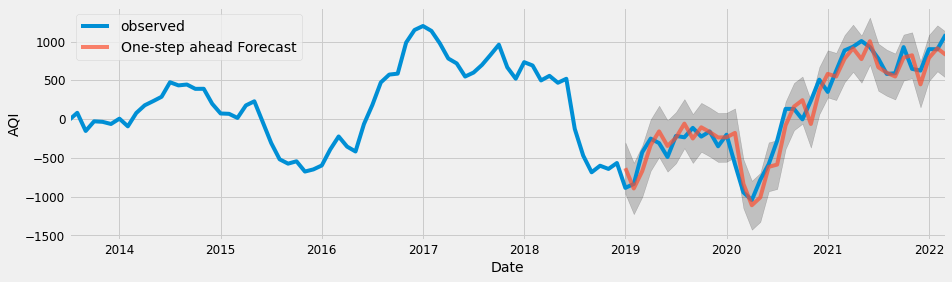

In [37]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

In [38]:
y_forecasted = pred.predicted_mean
y_truth = ts_y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 28465.15
The Root Mean Squared Error is 168.72


In [39]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 4))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table+200)

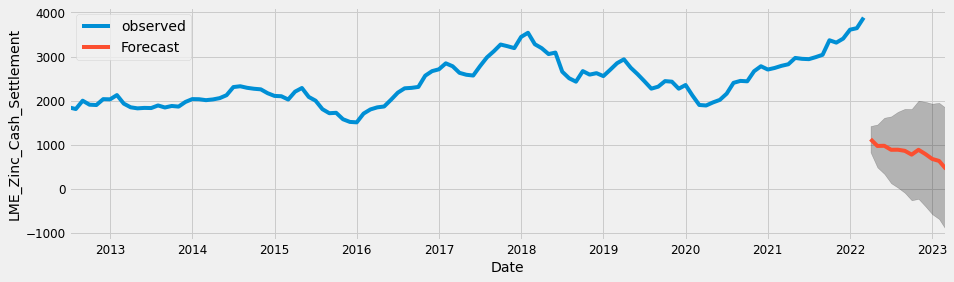

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-04-01,1131.344701,834.733230,1427.956171
1,2022-05-01,977.661225,491.992143,1463.330306
2,2022-06-01,981.578201,347.498841,1615.657562
3,2022-07-01,890.694316,134.702012,1646.686619
4,2022-08-01,892.448372,34.139524,1750.757221


In [40]:
final_table = forecast(results,12,y)
final_table.head()